<a href="https://colab.research.google.com/github/saswatiray55/Plant-Disease-Detection-App/blob/main/PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Step 1: Install the KaggleHub library
!pip install -q kagglehub

# Step 2: Upload your Kaggle API key
from google.colab import files
print("Please upload your kaggle.json file:")
files.upload()

# Step 3: Configure the Kaggle key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 5: Download, Unzip, and Save to Drive
import kagglehub
import zipfile
import os

print("\nDownloading dataset from Kaggle...")
# This is the download command from your screenshot
zip_path = kagglehub.dataset_download("soumiknafiul/plantvillage-dataset-labeled")
print(f"Dataset downloaded to: {zip_path}")

# Define where to save the unzipped folder in Google Drive
output_dir_drive = "/content/drive/MyDrive/plantvillage_dataset"

print(f"\nUnzipping dataset to {output_dir_drive}...")
with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(output_dir_drive)

print("\n✅ All Done! Your dataset is now permanently saved in your Google Drive.")

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
Mounted at /content/drive



100%|██████████| 874M/874M [00:42<00:00, 21.7MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/soumiknafiul/plantvillage-dataset-labeled/versions/1

Unzipping dataset to /content/drive/MyDrive/plantvillage_dataset...


IsADirectoryError: [Errno 21] Is a directory: '/root/.cache/kagglehub/datasets/soumiknafiul/plantvillage-dataset-labeled/versions/1'

In [6]:
import kagglehub
import os

# This part is the same as before
print("Downloading dataset from Kaggle...")
zip_path = kagglehub.dataset_download("soumiknafiul/plantvillage-dataset-labeled")
print(f"KaggleHub path: {zip_path}")

# --- THE FIX IS HERE ---

# Define where to save the folder in Google Drive
output_dir_drive = "/content/drive/MyDrive/plantvillage_dataset"

# Create the destination directory in Google Drive if it doesn't exist
os.makedirs(output_dir_drive, exist_ok=True)

print(f"\nCopying dataset to {output_dir_drive}...")

# Copy the contents of the source folder to your Drive
# The '/*' at the end of zip_path is important!
!cp -r {zip_path}/* {output_dir_drive}/

print("\n✅ All Done! Your dataset is now permanently saved in your Google Drive.")

KaggleHub path: /kaggle/input/plantvillage-dataset-labeled

Copying dataset to /content/drive/MyDrive/plantvillage_dataset...

✅ All Done! Your dataset is now permanently saved in your Google Drive.


In [8]:
import os

path_to_check = "/content/drive/MyDrive/plantvillage_dataset/PlantVillage Dataset (Labeled)"

try:
  # List the files/folders at the path you provided
  contents = os.listdir(path_to_check)
  print(f"Contents of your path:")
  print(contents[:5]) # Print the first 5 items
except FileNotFoundError:
  print(f"Error: The path '{path_to_check}' does not exist.")

Contents of your path:
['Grayscale Images', 'Segmented Images', 'Color Images', 'Individual Images']


In [9]:
import tensorflow as tf

# The correct, full path to the dataset
dataset_path = "/content/drive/MyDrive/plantvillage_dataset/PlantVillage Dataset (Labeled)/Color Images"

# --- Now create the dataset using this correct path ---
IMG_SIZE = 224
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMG_SIZE, IMG_SIZE),
  batch_size=BATCH_SIZE)

val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_SIZE, IMG_SIZE),
  batch_size=BATCH_SIZE)

# Get the class names
class_names = train_ds.class_names
print(f"Found {len(class_names)} classes.")
print("First 5 classes:", class_names[:5])

Found 15915 files belonging to 19 classes.
Using 12732 files for training.
Found 15915 files belonging to 19 classes.
Using 3183 files for validation.
Found 19 classes.
First 5 classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']


In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2

# Define the input shape and number of classes from your previous step
IMG_SIZE = 224
num_classes = len(class_names) # class_names was defined in the previous cell

# 1. Build the Model
# Load the base MobileNetV2 model
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Add our custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# 2. Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. Train the Model
print("Starting model training...")
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)
print("✅ Training complete!")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Starting model training...
Epoch 1/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 78s 166ms/step - accuracy: 0.6083 - loss: 1.3008 - val_accuracy: 0.7964 - val_loss: 0.6157
Epoch 2/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 51s 127ms/step - accuracy: 0.8340 - loss: 0.4932 - val_accuracy: 0.8388 - val_loss: 0.4553
Epoch 3/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 93s 156ms/step - accuracy: 0.8635 - loss: 0.3959 - val_accuracy: 0.8571 - val_loss: 0.4173
Epoch 4/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 52s 131ms/step - accuracy: 0.8795 - loss: 0.3331 - val_accuracy: 0.8574 - val_loss: 0.3998
Epoch 5/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.9000 - loss: 0.2783 - val_accuracy: 0.8451 - val_loss: 0.4428
Epoch 6/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 62s 156ms/step - accuracy: 0.9062 - loss: 0.2563 - val_accuracy: 0.8762 - val_loss: 0.3477
Epoch 7/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 82s 157ms/step - accuracy: 0.9163 - loss: 0.2298 - val_accuracy: 0.8690 - val_loss: 0.3800
Epoch 8

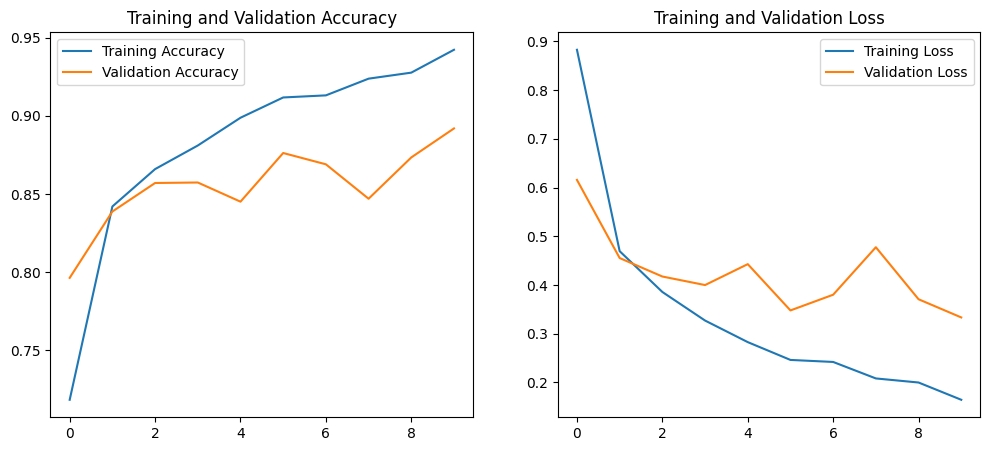

In [11]:
import matplotlib.pyplot as plt

# Get the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [12]:
# Save the model to a file in your Google Drive
model_path = "/content/drive/MyDrive/plant_disease_model_v1.h5"
model.save(model_path)
print(f"✅ Model saved to: {model_path}")

✅ Model saved to: /content/drive/MyDrive/plant_disease_model_v1.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


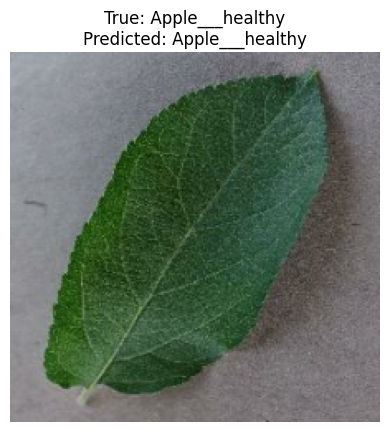

In [13]:
import numpy as np

# Take one batch of images and labels from the validation set
for images, labels in val_ds.take(1):
  # Get the first image and its true label
  first_image = images[0]
  true_label = labels[0]

  # Make a prediction
  # We need to add an extra dimension for the batch
  img_array = np.expand_dims(first_image, axis=0)
  prediction = model.predict(img_array)
  predicted_class_index = np.argmax(prediction)

  # Get the class names
  true_class_name = class_names[true_label]
  predicted_class_name = class_names[predicted_class_index]

  # Display the results
  plt.imshow(first_image.numpy().astype("uint8"))
  plt.title(f"True: {true_class_name}\nPredicted: {predicted_class_name}")
  plt.axis("off")
  plt.show()